<a href="https://colab.research.google.com/github/satishgunjal/Machine-Learning-Using-Python/blob/master/13_K_Means_Clustering/Exercise_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise

* Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
* Figure out if any preprocessing such as scaling would help here
Draw elbow plot and from that figure out optimal value of k

Import required laibraries

In [0]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
%matplotlib inline

Load iris dataset

In [4]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

## Understanding the IRIS dataset
* iris.DESCR > Complete description of dataset
* iris.data > Data to learn. Each training set is 4 digit array of features. Total 150 training sets
* iris.feature_names > Array of all 4 feature ['sepal length (cm)','sepal width cm)','petal length (cm)','petal width (cm)']
* iris.filename > CSV file name
* iris.target > The classification label. For every training set there is one classification label(0,1,2). Here 0 for setosa, 1 for versicolor and 2 for virginica
* iris.target_names > the meaning of the features. Its a array >> ['setosa', 'versicolor', 'virginica']
* As per problem defination we are only going work with 'petal length (cm)','petal width (cm)' columns from iris.data

Lets create data from using 'petal length (cm)','petal width (cm)'

In [13]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df = df.drop(df[['sepal length (cm)','sepal width (cm)']],axis='columns')
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Since values do not differ by order of magnitude, feature scaling is not required

Lets visualize the data using scatter plot

Text(0, 0.5, 'petal width (cm)')

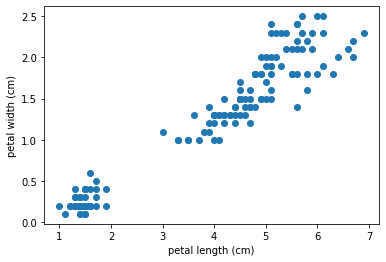

In [17]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

From above plot it clear that K= 2 will be a good cluster size.

Lets verify it with ElbowMethod

In [36]:
sse = []
k_range = range(1,10)

for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)

print(sse)

[550.8953333333334, 86.39021984551397, 31.371358974358973, 19.465989010989013, 13.916908757908757, 11.025145110250374, 9.191170634920635, 7.945363530473505, 6.456494541406307]


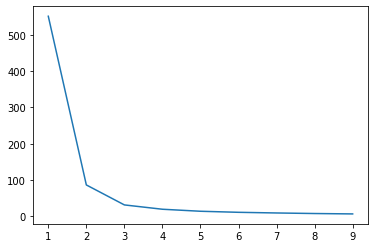

In [24]:
plt.plot(k_range, sse)

**As per ElboMethod K = 3 seems good choce lets use 3 as final value**

Now lets predict the cluster with K= 3

In [40]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

So we got 0,1 and 2 as our three different clusters. Lets add the cluster column to our dataframe, so that we can separate the dataframe for each cluster

In [42]:
df['flower'] = y_predicted
df.head()

,petal length (cm),petal width (cm),flower
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


Now we got the dataset with cluster labels assigned. Lets create separate dataframe for each cluster and plot a scatter plot

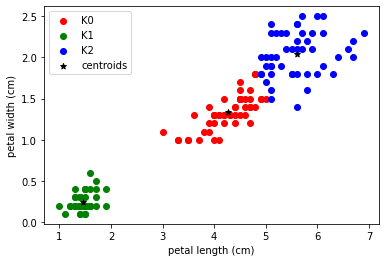

In [44]:
df0= df[df['flower'] == 0]
df1= df[df['flower'] == 1]
df2= df[df['flower'] == 2]

K0 = plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
K1 = plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
K2 = plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue')

centroids = plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black', marker='*')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend([K0,K1,K2,centroids],['K0','K1','K2','centroids'])